In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


In [4]:
age_model1 = load_model('/content/drive/MyDrive/files/CNN_new/1.1_age_input_output/output/age_model_acc_0.779.h5')
age_model2 = load_model('/content/drive/MyDrive/files/trial_testing/cnn_same2_model.h5')
age_model3 =load_model('/content/drive/MyDrive/files/trial_testing/second_age_model_checkpoint (1).h5') # Load your third age model
# Load the pre-trained gender classification models
gender_model_path_resnet = '/content/drive/MyDrive/files/trained_models/gender_model_resnet.h5'
gender_model_path_inception = '/content/drive/MyDrive/files/trained_models/my_gender_model (1).h5'
gender_model_path_cnn = '/content/drive/MyDrive/files/trained_models/cnn_gender_model.h5'

gender_model_resnet = load_model(gender_model_path_resnet)
gender_model_inception = load_model(gender_model_path_inception)
gender_model_cnn = load_model(gender_model_path_cnn)



In [5]:
# Define age and gender ranges
age_ranges = ['1-2', '3-6','6-9', '10-15', '15-20', '21-27', '28-35', '35-46', '46-55', '55-65', '65-100']
gender_ranges = ['male', 'female']

In [9]:
# Function to process and predict using ResNet50 model
def process_and_predict_resnet50(pil_img):
    pil_img_resized = pil_img.resize((200, 200), Image.LANCZOS)
    pil_img_rgb = pil_img_resized.convert('RGB')
    img_array = np.array(pil_img_rgb)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_array_normalized = img_array_expanded.astype('float32') / 255.0
    gender_prob = gender_model_resnet.predict(img_array_normalized)
    gender = "male" if gender_prob[0][0] < 0.5 else "female"
    return gender

In [10]:

# Function to process and predict using InceptionV3 model
def process_and_predict_inceptionv3(pil_img):
    pil_img_resized = pil_img.resize((200, 200), Image.LANCZOS)
    pil_img_rgb = pil_img_resized.convert('RGB')
    img_array = np.array(pil_img_rgb)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_array_normalized = img_array_expanded.astype('float32') / 255.0
    gender_prob = gender_model_inception.predict(img_array_normalized)
    gender = "female" if gender_prob[0][0] < 0.5 else "male"
    return gender

In [11]:
# Function to process and predict using CNN model
def process_and_predict_cnn(img_gray_face):
    img_gray_face_resized = cv2.resize(img_gray_face, (100, 100))
    img_gray_face_reshaped = img_gray_face_resized.reshape(-1, 100, 100, 1)
    gender_prob = gender_model_cnn.predict(img_gray_face_reshaped)
    gender = "male" if gender_prob[0][0] < 0.5 else "female"
    return gender


In [15]:
# Make predictions using individual models
resnet50_predictions = []
inceptionv3_predictions = []
cnn_predictions = []
true_labels = []
# Perform majority voting for ensemble prediction
all_predictions = [resnet50_predictions, inceptionv3_predictions, cnn_predictions]
ensemble_predictions = []

In [20]:
def predict_gender_ensemble(pil_img):
    gender_resnet50 = process_and_predict_resnet50(pil_img)
    gender_inceptionv3 = process_and_predict_inceptionv3(pil_img)
    gender_cnn = process_and_predict_cnn(np.array(pil_img))
    gender_labels = ['male', 'female']

    # Store individual predictions in a list
    all_predictions = [gender_resnet50, gender_inceptionv3, gender_cnn]

    # Count occurrences of each prediction
    vote_counts = {gender: all_predictions.count(gender) for gender in gender_labels}

    # Choose the gender with the highest count as the ensemble prediction
    majority_vote = max(vote_counts, key=vote_counts.get)

    return majority_vote


In [26]:
# Function to load image from Google Drive and predict gender
from PIL import Image
import cv2
def predict_gender_from_image(image_path):
    # Load image using OpenCV
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Predict gender using individual models
    gender_resnet50 = process_and_predict_resnet50(pil_img)
    gender_inceptionv3 = process_and_predict_inceptionv3(pil_img)
    gender_cnn = process_and_predict_cnn(img_gray)

    # Predict gender using ensemble model
    gender_ensemble = predict_gender_ensemble(pil_img)

    # Print individual model predictions
    print("Gender Predictions by Individual Models:")
    print("ResNet50 Model Prediction:", gender_resnet50)
    print("InceptionV3 Model Prediction:", gender_inceptionv3)
    print("CNN Model Prediction:", gender_cnn)

    # Print ensemble model prediction
    print("\nGender Prediction by Ensemble Model:")
    print("Ensemble Model Prediction:", gender_ensemble)

# Provide the path to the image in your Google Drive
image_path = "/content/drive/MyDrive/files/TEST_data/aaji.jpg"

# Predict gender from the image
predict_gender_from_image(image_path)


1/1 [==============================] - 0s 36ms/step
Gender Predictions by Individual Models:
ResNet50 Model Prediction: female
InceptionV3 Model Prediction: female
CNN Model Prediction: female

Gender Prediction by Ensemble Model:
Ensemble Model Prediction: female


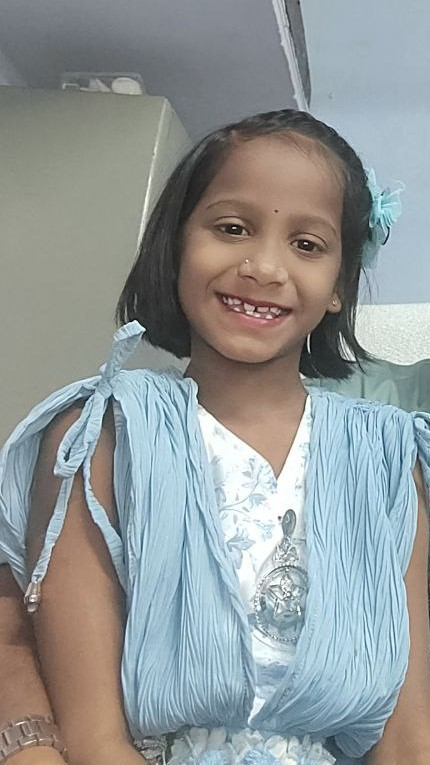

In [6]:
# Load and display the test image
img_path = "/content/drive/MyDrive/files/TEST_data/mitali.jpg"
from IPython.display import Image
pil_img = Image(filename=img_path)
display(pil_img)

In [7]:
# Load the test image and detect faces
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/files/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

1/1 [==============================] - 0s 72ms/step
Model 1 predicted age: 6-9
Model 2 predicted age: 10-15
Model 3 predicted age: 6-9
Ensembled age group: 6-9
1/1 [==============================] - 0s 36ms/step
Gender Predictions by Individual Models:
ResNet50 Model Prediction: female
InceptionV3 Model Prediction: female
CNN Model Prediction: female

Gender Prediction by Ensemble Model:
Ensemble Model Prediction: female


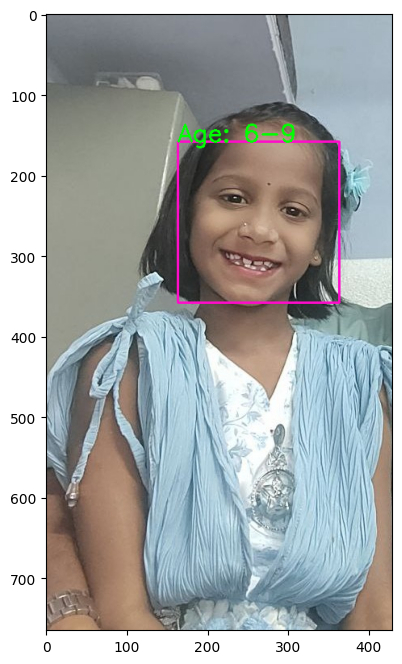

In [27]:
from collections import Counter
# Iterate through each detected face
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)
    img_gray = gray[y:y+h,x:x+w]

    # Resize the face region for age prediction
    age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
    age_input = age_image.reshape(-1, 200, 200, 1)

    # Make predictions using all three age models
    predictions = []
    for model in [age_model1, age_model2, age_model3]:
        predictions.append(np.argmax(model.predict(age_input)))

    # Count the occurrences of each age prediction
    age_counts = Counter(predictions)

    # Check if any two models predict the same age group
    most_common_age, occurrences = age_counts.most_common(1)[0]
    if occurrences >= 2:
        ensembled_age = most_common_age
    else:
        # Prioritize the prediction of the first CNN age model
        ensembled_age = predictions[0]

    # Display each separate age predicted by the models
    for i, pred in enumerate(predictions, 1):
        print(f"Model {i} predicted age: {age_ranges[pred]}")

    # Display the ensembled age group
    print(f"Ensembled age group: {age_ranges[ensembled_age]}")

    # Add text to the image
    output_str = f"Age: {age_ranges[ensembled_age]}"
    col = (0, 255, 0)
    cv2.putText(test_image, output_str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

# Display the annotated image
predict_gender_from_image(img_path)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


1/1 [==============================] - 0s 201ms/step
Model 1 predicted age: 10-15
Model 2 predicted age: 15-20
Model 3 predicted age: 15-20
Ensembled age group: 15-20
1/1 [==============================] - 0s 36ms/step
Gender Predictions by Individual Models:
ResNet50 Model Prediction: female
InceptionV3 Model Prediction: female
CNN Model Prediction: male

Gender Prediction by Ensemble Model:
Ensemble Model Prediction: female


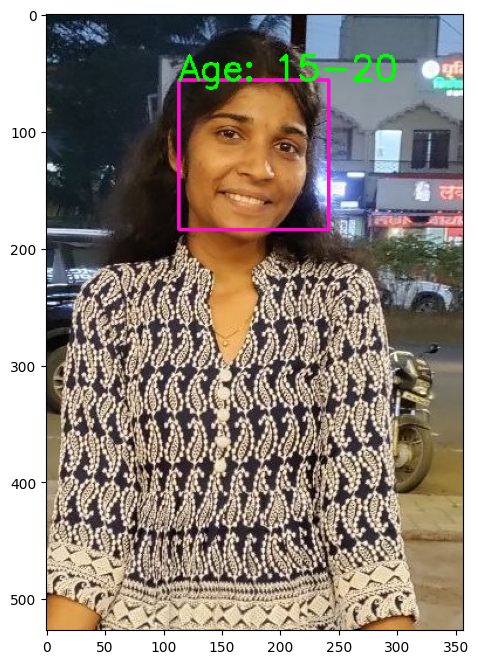

In [29]:
from collections import Counter
# Load the test image and detect faces
img_path = "/content/drive/MyDrive/files/TEST_data/shruti.jpg"
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/files/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# Iterate through each detected face
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)
    img_gray = gray[y:y+h,x:x+w]

    # Resize the face region for age prediction
    age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
    age_input = age_image.reshape(-1, 200, 200, 1)

    # Make predictions using all three age models
    predictions = []
    for model in [age_model1, age_model2, age_model3]:
        predictions.append(np.argmax(model.predict(age_input)))

    # Count the occurrences of each age prediction
    age_counts = Counter(predictions)

    # Check if any two models predict the same age group
    most_common_age, occurrences = age_counts.most_common(1)[0]
    if occurrences >= 2:
        ensembled_age = most_common_age
    else:
        # Prioritize the prediction of the first CNN age model
        ensembled_age = predictions[0]

    # Display each separate age predicted by the models
    for i, pred in enumerate(predictions, 1):
        print(f"Model {i} predicted age: {age_ranges[pred]}")

    # Display the ensembled age group
    print(f"Ensembled age group: {age_ranges[ensembled_age]}")

    # Add text to the image
    output_str = f"Age: {age_ranges[ensembled_age]}"
    col = (0, 255, 0)
    cv2.putText(test_image, output_str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

# Display the annotated image
predict_gender_from_image(img_path)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


1/1 [==============================] - 0s 110ms/step
Model 1 predicted age: 10-15
Model 2 predicted age: 21-27
Model 3 predicted age: 21-27
Ensembled age group: 21-27
1/1 [==============================] - 0s 35ms/step
Gender Predictions by Individual Models:
ResNet50 Model Prediction: male
InceptionV3 Model Prediction: male
CNN Model Prediction: female

Gender Prediction by Ensemble Model:
Ensemble Model Prediction: male


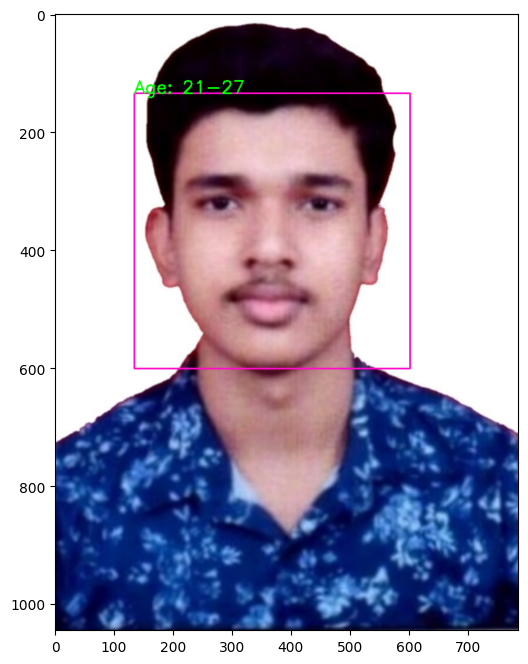

In [30]:
from collections import Counter
# Load the test image and detect faces
img_path = "/content/drive/MyDrive/files/TEST_data/om.jpg"
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/files/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# Iterate through each detected face
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)
    img_gray = gray[y:y+h,x:x+w]

    # Resize the face region for age prediction
    age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
    age_input = age_image.reshape(-1, 200, 200, 1)

    # Make predictions using all three age models
    predictions = []
    for model in [age_model1, age_model2, age_model3]:
        predictions.append(np.argmax(model.predict(age_input)))

    # Count the occurrences of each age prediction
    age_counts = Counter(predictions)

    # Check if any two models predict the same age group
    most_common_age, occurrences = age_counts.most_common(1)[0]
    if occurrences >= 2:
        ensembled_age = most_common_age
    else:
        # Prioritize the prediction of the first CNN age model
        ensembled_age = predictions[0]

    # Display each separate age predicted by the models
    for i, pred in enumerate(predictions, 1):
        print(f"Model {i} predicted age: {age_ranges[pred]}")

    # Display the ensembled age group
    print(f"Ensembled age group: {age_ranges[ensembled_age]}")

    # Add text to the image
    output_str = f"Age: {age_ranges[ensembled_age]}"
    col = (0, 255, 0)
    cv2.putText(test_image, output_str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

# Display the annotated image
predict_gender_from_image(img_path)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


1/1 [==============================] - 0s 64ms/step
Model 1 predicted age: 21-27
Model 2 predicted age: 21-27
Model 3 predicted age: 6-9
Ensembled age group: 21-27
1/1 [==============================] - 0s 36ms/step
Gender Predictions by Individual Models:
ResNet50 Model Prediction: female
InceptionV3 Model Prediction: female
CNN Model Prediction: female

Gender Prediction by Ensemble Model:
Ensemble Model Prediction: female


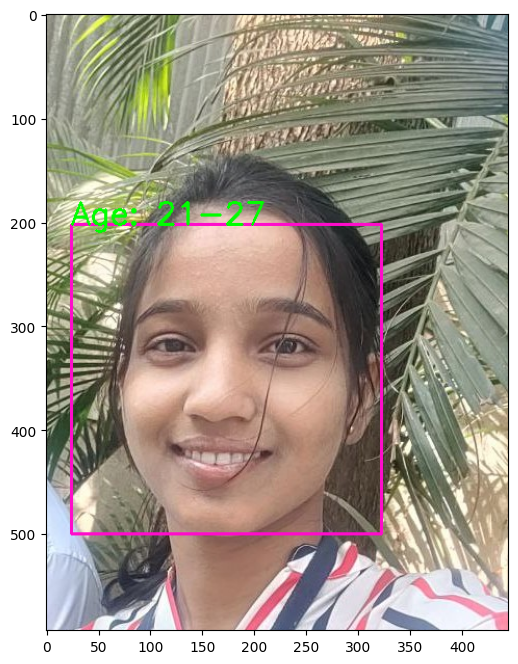

In [31]:
from collections import Counter
# Load the test image and detect faces
img_path = "/content/drive/MyDrive/files/TEST_data/shrutika.jpg"
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/files/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# Iterate through each detected face
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)
    img_gray = gray[y:y+h,x:x+w]

    # Resize the face region for age prediction
    age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
    age_input = age_image.reshape(-1, 200, 200, 1)

    # Make predictions using all three age models
    predictions = []
    for model in [age_model1, age_model2, age_model3]:
        predictions.append(np.argmax(model.predict(age_input)))

    # Count the occurrences of each age prediction
    age_counts = Counter(predictions)

    # Check if any two models predict the same age group
    most_common_age, occurrences = age_counts.most_common(1)[0]
    if occurrences >= 2:
        ensembled_age = most_common_age
    else:
        # Prioritize the prediction of the first CNN age model
        ensembled_age = predictions[0]

    # Display each separate age predicted by the models
    for i, pred in enumerate(predictions, 1):
        print(f"Model {i} predicted age: {age_ranges[pred]}")

    # Display the ensembled age group
    print(f"Ensembled age group: {age_ranges[ensembled_age]}")

    # Add text to the image
    output_str = f"Age: {age_ranges[ensembled_age]}"
    col = (0, 255, 0)
    cv2.putText(test_image, output_str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

# Display the annotated image
predict_gender_from_image(img_path)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


1/1 [==============================] - 0s 89ms/step
Model 1 predicted age: 28-35
Model 2 predicted age: 65-100
Model 3 predicted age: 55-65
Ensembled age group: 28-35
1/1 [==============================] - 0s 67ms/step
Gender Predictions by Individual Models:
ResNet50 Model Prediction: female
InceptionV3 Model Prediction: female
CNN Model Prediction: female

Gender Prediction by Ensemble Model:
Ensemble Model Prediction: female


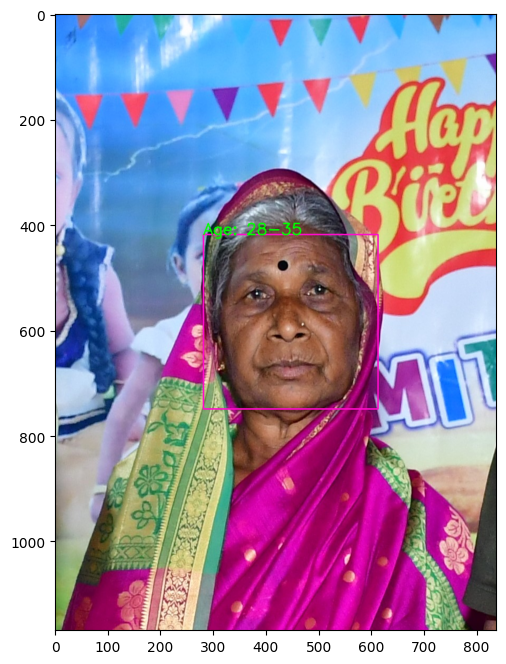

In [34]:
from collections import Counter
# Load the test image and detect faces
img_path = "/content/drive/MyDrive/files/TEST_data/aaji.jpg"
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/files/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# Iterate through each detected face
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)
    img_gray = gray[y:y+h,x:x+w]

    # Resize the face region for age prediction
    age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
    age_input = age_image.reshape(-1, 200, 200, 1)

    # Make predictions using all three age models
    predictions = []
    for model in [age_model1, age_model2, age_model3]:
        predictions.append(np.argmax(model.predict(age_input)))

    # Count the occurrences of each age prediction
    age_counts = Counter(predictions)

    # Check if any two models predict the same age group
    most_common_age, occurrences = age_counts.most_common(1)[0]
    if occurrences >= 2:
        ensembled_age = most_common_age
    else:
        # Prioritize the prediction of the first CNN age model
        ensembled_age = predictions[0]

    # Display each separate age predicted by the models
    for i, pred in enumerate(predictions, 1):
        print(f"Model {i} predicted age: {age_ranges[pred]}")

    # Display the ensembled age group
    print(f"Ensembled age group: {age_ranges[ensembled_age]}")

    # Add text to the image
    output_str = f"Age: {age_ranges[ensembled_age]}"
    col = (0, 255, 0)
    cv2.putText(test_image, output_str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

# Display the annotated image
predict_gender_from_image(img_path)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()


1/1 [==============================] - 0s 85ms/step
Model 1 predicted age: 21-27
Model 2 predicted age: 21-27
Model 3 predicted age: 6-9
Ensembled age group: 21-27
1/1 [==============================] - 0s 140ms/step
Gender Predictions by Individual Models:
ResNet50 Model Prediction: female
InceptionV3 Model Prediction: female
CNN Model Prediction: female

Gender Prediction by Ensemble Model:
Ensemble Model Prediction: female


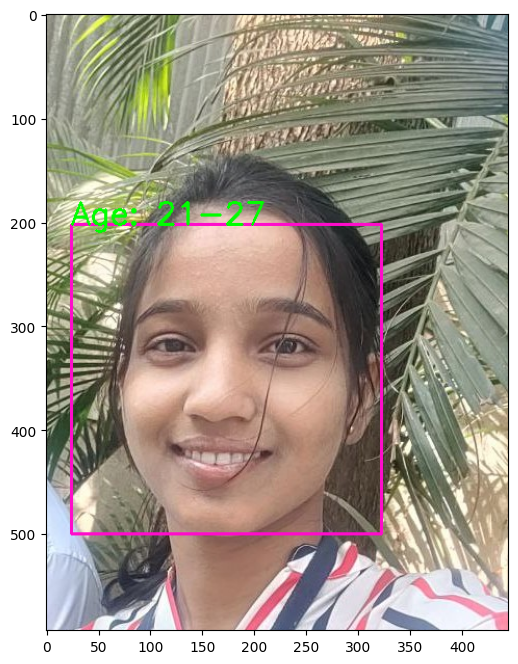

In [36]:
from collections import Counter
# Load the test image and detect faces
img_path = "/content/drive/MyDrive/files/TEST_data/shrutika.jpg"
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/files/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# Iterate through each detected face
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)
    img_gray = gray[y:y+h,x:x+w]

    # Resize the face region for age prediction
    age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
    age_input = age_image.reshape(-1, 200, 200, 1)

    # Make predictions using all three age models
    predictions = []
    for model in [age_model1, age_model2, age_model3]:
        predictions.append(np.argmax(model.predict(age_input)))

    # Count the occurrences of each age prediction
    age_counts = Counter(predictions)

    # Check if any two models predict the same age group
    most_common_age, occurrences = age_counts.most_common(1)[0]
    if occurrences >= 2:
        ensembled_age = most_common_age
    else:
        # Prioritize the prediction of the first CNN age model
        ensembled_age = predictions[0]

    # Display each separate age predicted by the models
    for i, pred in enumerate(predictions, 1):
        print(f"Model {i} predicted age: {age_ranges[pred]}")

    # Display the ensembled age group
    print(f"Ensembled age group: {age_ranges[ensembled_age]}")

    # Add text to the image
    output_str = f"Age: {age_ranges[ensembled_age]}"
    col = (0, 255, 0)
    cv2.putText(test_image, output_str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

# Display the annotated image
predict_gender_from_image(img_path)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()
